In [29]:
#imports
from matplotlib import pyplot as plt
plt.style.use("seaborn")

In [7]:
#read score file
all_lines=[]#holds all lines in file
all_scores=[]
frames=[]#holds frame names
frame_scores=[]#holds the scores in one frame. updated in for each frame
frame_lines=[]#holds the lines which belongs to one frame 
highest_scores=[]#holds score of bb in a frame which has the highest score
selected_bb_names=[]#holds the names of bbs which have high scores
selected_bbs_coordinates=[]#holds the coordinates of selected bbs
max_frame_number=838
for i in range(1,max_frame_number+1):
    frames.append("frame"+str(i))

with open("with_update_gt_2way.txt","r") as f:
    for line in f:
        all_lines.append(line)
    
for frame in frames:
    for line in all_lines:
        splitted_line=line.split(" | ")
        if splitted_line[0]==frame:
            frame_scores.append(splitted_line[2])
    all_scores.append(frame_scores)
    frame_scores=[]
    

for scores in all_scores:
    highest_scores.append(float(scores[0].split("\n")[0]))
    
for frame in frames:
    for line in all_lines:
        splitted_line=line.split(" | ")
        if splitted_line[0]==frame:
            frame_lines.append(splitted_line)
    selected_bb_names.append(frame_lines[0][1].split("|")[0])
    frame_lines=[]
            

In [13]:
#get the bb numbers from selected bb names 
#read group1_4.txt, store all lines in a list, select the lines which have the same order with 
#selected bb names
g14_alllines=[]
selected_bb_numbers=[]
for bb_name in selected_bb_names:
    selected_bb_numbers.append(int(bb_name.split(".")[0][2:]))
    
with open("group1_4.txt","r") as f:
    for line in f:
        g14_alllines.append(line)
        
for number in selected_bb_numbers:
    splitted=g14_alllines[number].split(",")
    selected_bbs_coordinates.append([float(splitted[1]),
                                     float(splitted[2]),
                                     float(splitted[1])+float(splitted[3]),
                                     float(splitted[2])+float(splitted[4])])

In [14]:
selected_bbs_coordinates[0:10]

[[789.0, 488.0, 873.0, 572.0],
 [878.0, 433.0, 931.0, 536.0],
 [780.0, 475.0, 839.0, 599.0],
 [772.0, 476.0, 852.0, 598.0],
 [880.0, 435.0, 914.0, 545.0],
 [882.0, 427.0, 917.0, 545.0],
 [873.0, 428.0, 914.0, 534.0],
 [874.0, 426.0, 914.0, 530.0],
 [875.0, 432.0, 908.0, 528.0],
 [869.0, 424.0, 914.0, 521.0]]

In [10]:
selected_bb_numbers[0:10]

[0, 12, 30, 47, 54, 70, 89, 102, 113, 126]

In [15]:
#read ground truth file
gt_lines=[]
gt_bbs=[]#holds the bounding box coordinates of groundtruths of each frame
with open("groundtruthgroup1.txt","r") as f:
    for line in f:
        splitted=line.split(",")
        gt_bbs.append([float(splitted[0]),
                       float(splitted[1]),
                       float(splitted[0])+float(splitted[2]),
                       float(splitted[1])+float(splitted[3])])

In [16]:
gt_bbs[0:10]

[[789.0, 489.0, 873.0, 573.0],
 [789.0, 488.0, 830.0, 595.0],
 [788.0, 488.0, 829.0, 595.0],
 [788.0, 487.0, 829.0, 594.0],
 [789.0, 484.0, 830.0, 591.0],
 [789.0, 482.0, 829.0, 589.0],
 [790.0, 479.0, 830.0, 586.0],
 [790.0, 477.0, 829.0, 582.0],
 [791.0, 476.0, 830.0, 579.0],
 [791.0, 474.0, 829.0, 575.0]]

In [17]:
#IoU function
def IoU(boxA, boxB):
	    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
            # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
            # compute the area of both the prediction and ground-truth
            # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
            # compute the intersection over union by taking the intersection
            # area and dividing it by the sum of prediction + ground-truth
            # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
            # return the intersection over union value
    return iou

In [18]:
iou_scores=[]#holds intersection over union scores of high score bb's and groundtruths
for box,box_gt in zip(selected_bbs_coordinates,gt_bbs):
    iou_scores.append(IoU(box,box_gt))

In [19]:
iou_scores[0:10]

[0.9767441860465116,
 0.0,
 0.6048,
 0.45528455284552843,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<function matplotlib.pyplot.show(close=None, block=None)>

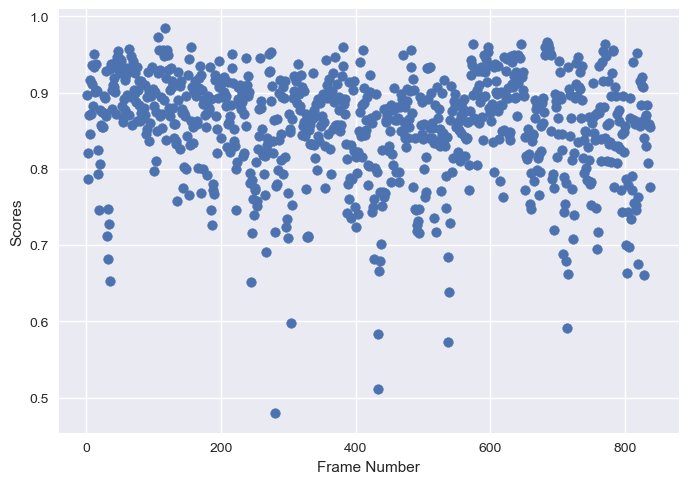

In [30]:
plt.scatter(range(1,len(highest_scores)+1),highest_scores)
plt.xlabel("Frame Number")
plt.ylabel("Scores")
plt.show

In [31]:
count=0
count_from_zero=0
for iou in iou_scores:
    if iou>=0.5:
        count+=1
    if iou>0.0:
        count_from_zero+=1

In [32]:
count

95

In [33]:
count_from_zero

131